<a href="https://colab.research.google.com/github/bouramayaya/Cours-OC/blob/main/P3C5_TP_bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partitionnez vos données - Le Bag of Words

# 1 Preliminary

## 1.1 Context

Ce TP est en lien avec l'activité [Partitionnez vos données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345241-tp-partitionnez-vos-donnees), de la partie 3 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le *jeu de données des cours suivis*.

Prenez le temps de bien **lire**, **comprendre** et **tester** le code ci dessous.

<br>

------------------------------

<br>

En cas de question, n'hésitez pas à nous adresser vos remarques ou suggestions via ce [lien](https://openclassrooms.zendesk.com/hc/fr/requests/new).

<br>

-------------------------

<br>

* version : 0.0.1
* last update:  2022-08-25
* author : [Alexandre Gazagnes](https://twitter.com/Alex_Gazagnes)

<br>

## 1.2 Imports

Importons les librairies : 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 1.3 Graphics

Chargeons les librairies graphiques : 

In [ ]:
sns.set()

## 1.4 Data

Nous allons maintenant charger les données. Pour ce faire vous pouvez les retrouver sur cette [page du cours](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours).

<br>

------------------------


<br>


Si vous utlisez Google Colab et que vous ne savez pas comment importer un fichier .csv, voici une [vidéo](https://youtu.be/6HFlwqK3oeo?t=171) à regarder à partir de 2:53

<br>

-------------------------------------

<br>


Importons notre fichier `bag_of_words.csv`: 

In [ ]:
data = pd.read_csv('bag_of_words.csv')
data.head()

,titre,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,...,évoqué,évoquées,évoqués,évènement,évènements,événement,événements,êtres,œil,œuvre
0,Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000
1,Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000
2,Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000
3,Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000
4,Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651


105 lignes, pour plus de 9 000 colonnes ! 

In [ ]:
data.shape

(105, 9344)

Ensuite le fichier `courses_info` : 

In [ ]:
courses_info = pd.read_csv('courses_info.csv')
courses_info.head()

,title,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
0,Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
1,Réalisez des calculs distribués sur des donnée...,False,False,False,True,False,False,False,False,False,False,False,False,data
2,Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
3,Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
4,Lancez une campagne de publicité avec Google A...,False,False,False,False,False,False,True,True,False,False,False,False,marketing


Regradons la forme du DataFrame : 

In [ ]:
courses_info.shape

(112, 14)

# 2 Data Preparation

Avant de nous plonger dans le grand bain, un peu de préparation.

Nous allons fusionner les deux dataframes pour obtenir les différents thèmes dans le dataframe `data`.

## 2.1 Merge

Commencons par sélectionner les colonnes de `courses_info`: 

In [ ]:
cols = ["title", "theme"]

Enregistrons ce dataframe dans une variable temporaire `tmp` : 

In [ ]:
tmp = courses_info[cols]
tmp.head()

,title,theme
0,Apprenez à gérer les conflits,RH
1,Réalisez des calculs distribués sur des donnée...,data
2,Managez une équipe au quotidien,RH
3,Gérez votre code avec Git et GitHub,dev
4,Lancez une campagne de publicité avec Google A...,marketing


On peut désormais faire le merge.  Nous allons utiliser l'argument `indicator=True` pour vérifier que le merge s'est bien déroulé.

Pour plus de précisions, c'est par [ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

Comme la colonne `theme`, qui correspond au mot *thème* est probablement dans le dataframe `data`, nous auront un doublon des colonnes.  Cela n'est pas possible, donc la nouvelle colonne s'appellera `theme_y`:

In [ ]:
df = data.merge(tmp, right_on="title", left_on="titre", indicator=True)
df.head()

,titre,aaaa,abandonner,abattement,abbr,abc,abondement,abonnement,abonner,abonnés,...,évènement,évènements,événement,événements,êtres,œil,œuvre,title_y,theme_y,_merge
0,Concevez des architectures Big Data,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0000,0.0,0.000469,0.000000,0.000000,0.000000,Concevez des architectures Big Data,data,both
1,Apprenez à coder avec JavaScript,0.000000,0.0,0.0,0.0,0.000499,0.0,0.0,0.000000,0.000000,...,0.0,0.0001,0.0,0.000000,0.000000,0.000000,0.000000,Apprenez à coder avec JavaScript,dev,both
2,Concevez votre site web avec PHP et MySQL,0.000524,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0000,0.0,0.000000,0.000000,0.000087,0.000000,Concevez votre site web avec PHP et MySQL,dev,both
3,Réussir sa campagne d'e-mailing avec MailChimp,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.020408,0.020408,...,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,Réussir sa campagne d'e-mailing avec MailChimp,marketing,both
4,Utilisez des modèles supervisés non linéaires,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0000,0.0,0.000000,0.000325,0.000000,0.000651,Utilisez des modèles supervisés non linéaires,data,both


Vérifions que la colonne `_merge` ne contient que les valeurs `both` : 

In [ ]:
df._merge.value_counts()

both          105
left_only       0
right_only      0
Name: _merge, dtype: int64

Tout est OK!

## 2.2 Files split

Nous allons maintenant séparer notre matrice de mots, notée `X` du reste de nos données. Nous stockerons les thèmes dans une variable `themes` et les noms des cours dans une variable `names`.

Commencons par `themes`
 : 

In [ ]:
themes = df.theme_y.values
themes[:10]

array(['data', 'dev', 'dev', 'marketing', 'data', 'RH & marketing',
       'data', 'dev', 'data', 'dev'], dtype=object)

Ensuite `names` : 

In [ ]:
names = data.titre.values
names[:10]

array(['Concevez des architectures Big Data',
       'Apprenez à coder avec JavaScript',
       'Concevez votre site web avec PHP et MySQL',
       "Réussir sa campagne d'e-mailing avec MailChimp",
       'Utilisez des modèles supervisés non linéaires',
       'Animez une communauté Facebook',
       'Classez et segmentez des données visuelles',
       'Gérez votre projet informatique facilement !',
       'Créez votre Data Lake',
       'Découvrez le fonctionnement des algorithmes'], dtype=object)

Et enfin, `X`.

Pour obtenir `X` et ne garder que les *mots*, il nous faut supprimer les colonnes en trop : 

In [ ]:
cols = ["titre", "theme_y", "_merge", "title_y"]
X = df.drop(columns=cols).values
X[:10]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.23788739e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.72981231e-05, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.94204178e-04, 0.00000000e+00, 8.82612533e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## 2.3 Scaling

Nous allons maintenant scaler nos données. 

Pour en savoir plus sur le scaling des données, c'est par [ici](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

On commence par instancier notre scaler : 

In [ ]:
std_scale = preprocessing.StandardScaler()

On l'entraine : 

In [ ]:
std_scale.fit(X)

StandardScaler()

Et on transforme nos données : 

In [ ]:
X_scaled = std_scale.transform(X)
X_scaled[:10]

array([[-0.15710774, -0.26729689, -0.16964264, ..., -0.32346245,
        -0.32270297, -0.37914478],
       [-0.15710774, -0.26729689, -0.16964264, ..., -0.32346245,
        -0.32270297, -0.37914478],
       [ 8.02916858, -0.26729689, -0.16964264, ..., -0.32346245,
        -0.01580055, -0.37914478],
       ...,
       [-0.15710774, -0.26729689, -0.16964264, ...,  3.02592587,
        -0.32270297,  0.60330288],
       [-0.15710774, -0.26729689, -0.16964264, ..., -0.32346245,
        -0.32270297, -0.37914478],
       [-0.15710774, -0.26729689, -0.16964264, ..., -0.32346245,
        -0.32270297, -0.37914478]])

Grace à la méthode `describe`, on confirme que la moyenne est à 0 et l'écart-type à 1: 

In [ ]:
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6,7,8,9,...,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342
mean,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 3 Clustering 

On peut - enfin - commencer notre clustering!

## 3.1 Linkage

Nous allons calculer les distances en spécifiant la méthode à utiliser:

In [ ]:
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[  5.        ,  15.        ,  67.08388595,   2.        ],
       [  3.        , 105.        ,  74.40219418,   3.        ],
       [ 82.        , 106.        ,  79.01447844,   4.        ],
       [ 37.        ,  80.        ,  98.91101721,   2.        ],
       [ 34.        ,  98.        , 100.64735993,   2.        ],
       [ 63.        , 101.        , 101.61942786,   2.        ],
       [ 69.        , 107.        , 103.29833521,   5.        ],
       [ 25.        ,  66.        , 103.65713341,   2.        ],
       [ 50.        , 103.        , 106.02937382,   2.        ],
       [ 22.        ,  32.        , 106.6204984 ,   2.        ]])

## 3.2 Dendrogram

Nous pouvons désormais affichier le dendrogramme.

Notez que nous spécifions les `labels` et l'`orientation` :

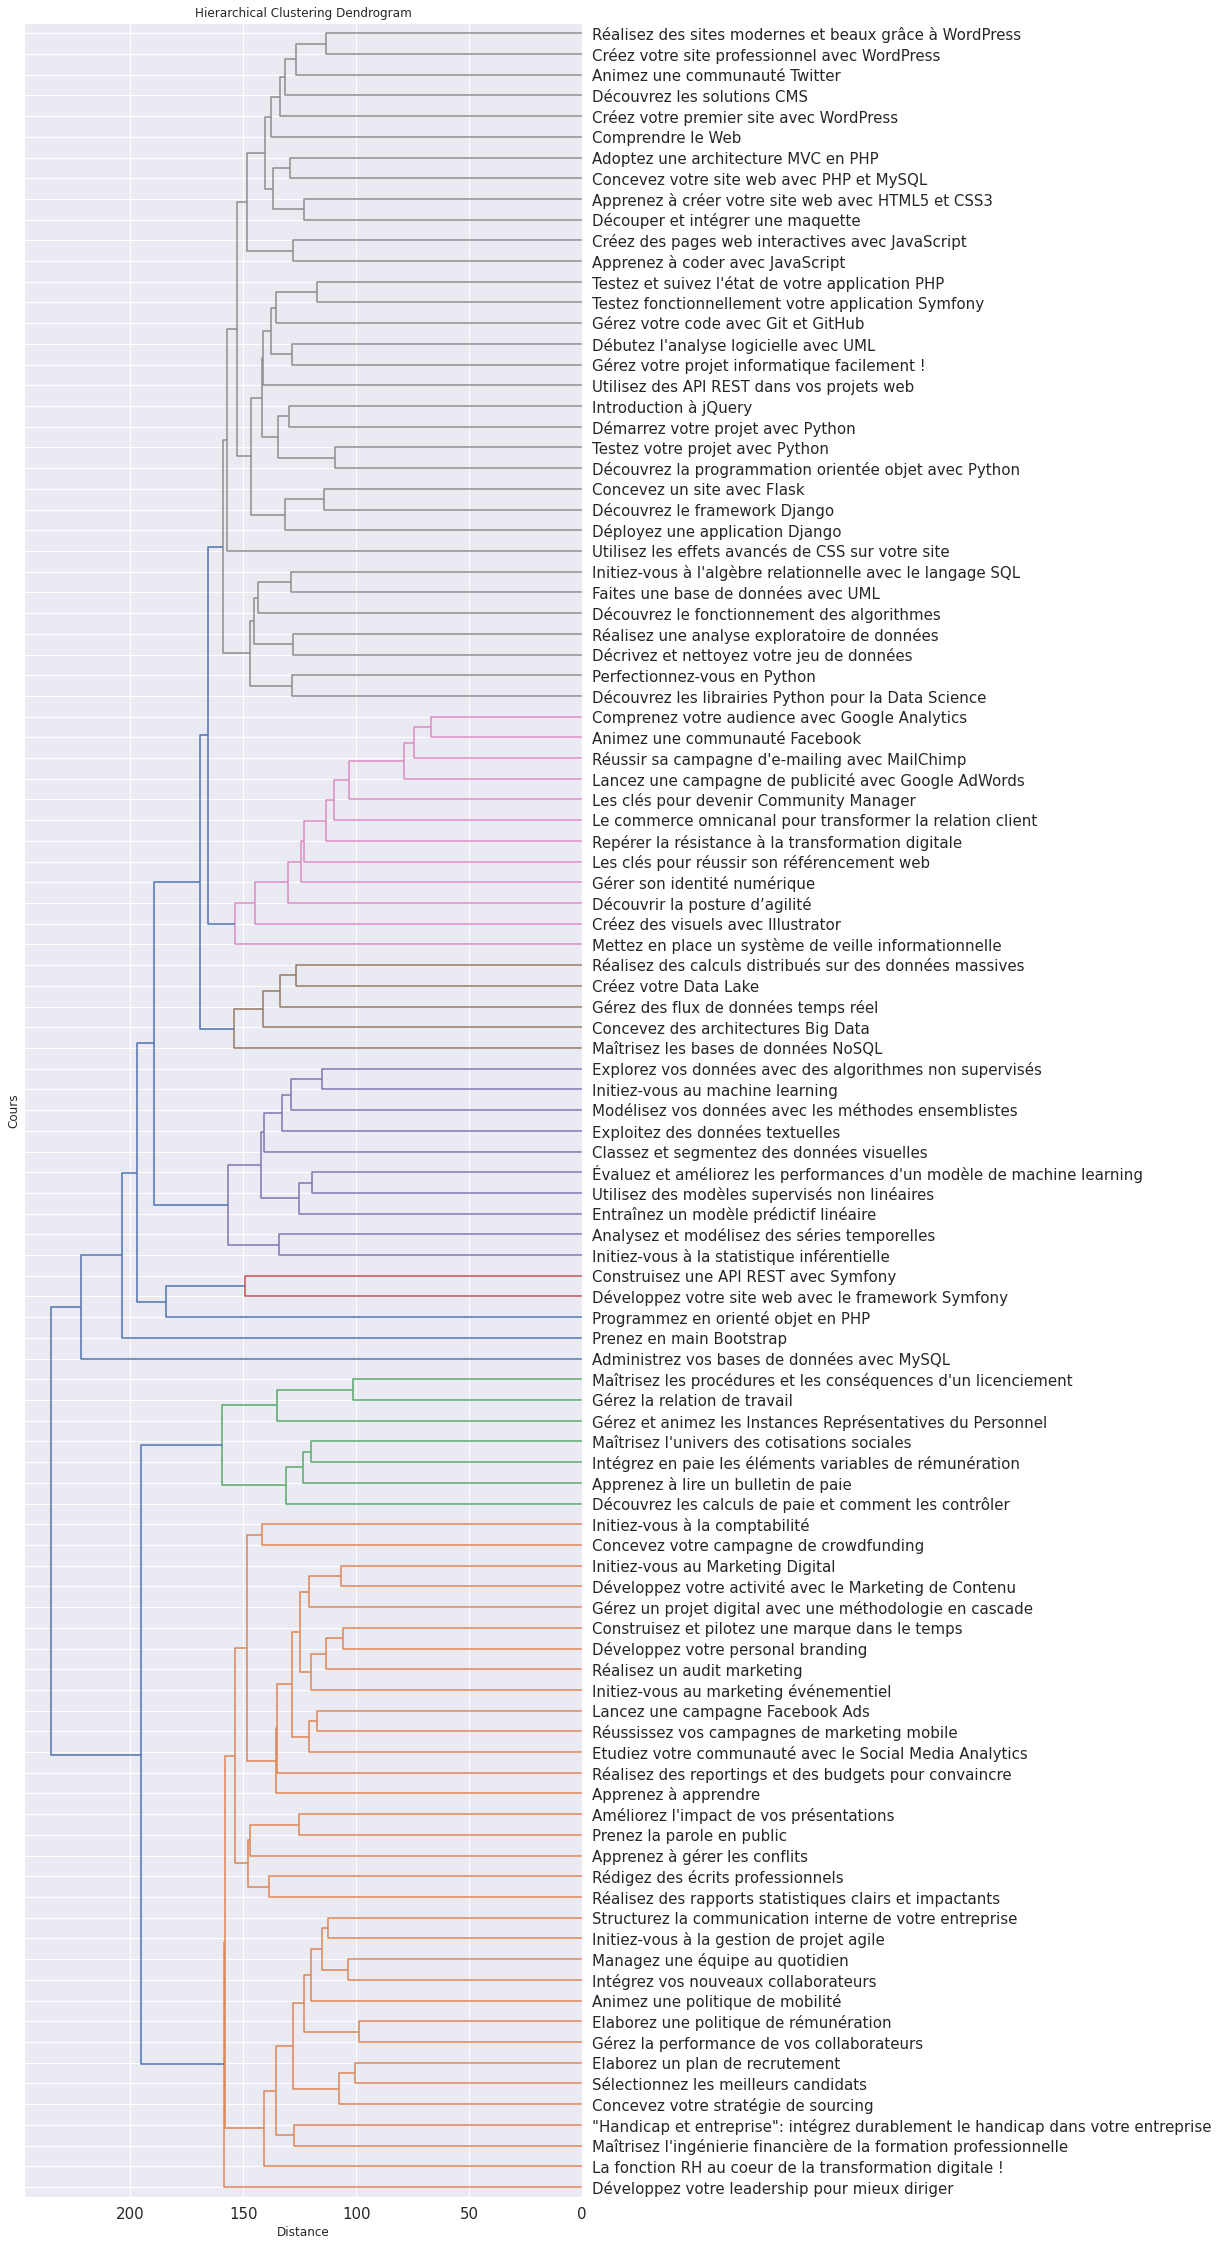

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Cours")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)


## 3.3 Clusters

Ensuite, on défini le nombre de clusters que l'on souhaite:

In [ ]:
k=12

On applique ensuite la fonction `fclusters`de `scipy`pour définir les clusters : 

In [ ]:
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([ 7, 10, 10,  8,  6,  8,  6, 10,  7,  9,  6,  1,  6,  1,  9,  8, 10,
        1,  1, 10, 10,  7,  1, 10, 10,  1, 10, 10, 10, 10,  9,  1,  1,  8,
        1,  1,  6,  1,  9,  4,  1,  1,  1,  8, 10,  1, 10,  1,  1,  1,  1,
        8, 10, 10,  2,  8,  8,  1,  1,  1, 10,  7, 10,  3, 10,  4,  1,  6,
       10,  8,  6,  9,  5,  2,  9,  7, 10,  1, 10, 12,  1,  1,  8,  6,  6,
       10,  3, 10, 10,  1,  6, 11,  8,  1,  1,  2,  1,  1,  1,  8,  2,  3,
       10,  1,  9], dtype=int32)

## 3.4 Analysis

Nous allons maintenant analyser la pertinence de notre clustering.

Pour cela, il nous faut une [table de contingence](https://fr.wikipedia.org/wiki/Tableau_de_contingence#:~:text=Un%20tableau%20de%20contingence%20est,la%20d%C3%A9pendance%20entre%20deux%20caract%C3%A8res.) .

Nous l'obtenons grace à la fonction `crosstab` de `pandas`.

Pour info la documentation est [ici](https://www.google.com/search?q=pandas+crosstab). Le 1er lien devrait être le bon :).

In [ ]:
crosstab = pd.crosstab(themes, clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="theme", inplace=True)
crosstab

cluster,1,2,3,4,5,6,7,8,9,10,11,12
theme,,,,,,,,,,,,
RH,14,4,3,0,0,0,0,2,0,0,0,0
RH & marketing,6,0,0,0,0,0,0,3,0,1,0,0
data,1,0,0,0,0,10,5,0,4,0,0,0
dev,0,0,0,2,1,0,0,0,3,18,1,1
marketing,10,0,0,0,0,0,0,6,0,2,0,0
multi-parcours,2,0,0,0,0,0,0,1,0,5,0,0


Nous avons notre table de contingence, mais une petite touche "graphique" ne ferait pas de mal! 

C'est possible gràce à la fonction `heatmap` de `seaborn`.

La documentation devrait être facilement accessible grace à ce [site web](https://www.google.com/).

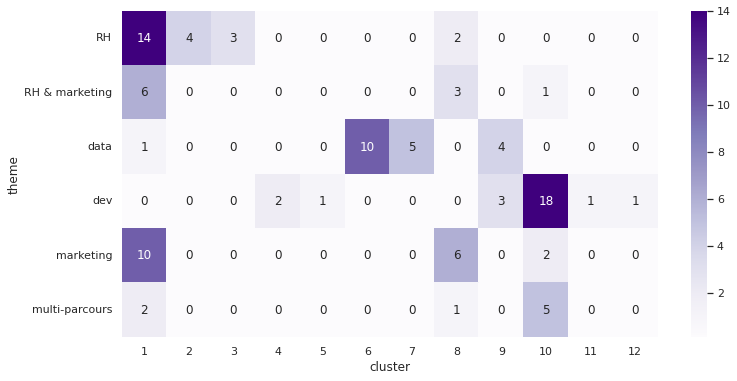

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(crosstab, vmin=0.1, vmax=14, annot=True, cmap="Purples")

Enfin et pour finir nous pouvons afficher les cours pour chaque cluster : 

In [ ]:
df = pd.DataFrame({"name" : names, "theme" : themes, "cluster" : clusters})
df.head()

,name,theme,cluster
0,Concevez des architectures Big Data,data,7
1,Apprenez à coder avec JavaScript,dev,10
2,Concevez votre site web avec PHP et MySQL,dev,10
3,Réussir sa campagne d'e-mailing avec MailChimp,marketing,8
4,Utilisez des modèles supervisés non linéaires,data,6


In [ ]:
for i in range(1, 13) : 
    # on fait une selection
    sub_df = df.loc[df.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    names_list = sub_df.name.values
    themes_list = sub_df.theme.values

    # on créé une liste de couple nom/theme
    ziped = zip(names_list, themes_list) 
    txt = [f"{n} ({t})" for n, t in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")
    

cluster : 1
Apprenez à apprendre (multi-parcours) / Initiez-vous à la gestion de projet agile (RH & marketing) / Réussissez vos campagnes de marketing mobile (marketing) / Gérez un projet digital avec une méthodologie en cascade (multi-parcours) / Développez votre activité avec le Marketing de Contenu (marketing) / Intégrez vos nouveaux collaborateurs (RH) / Maîtrisez l'ingénierie financière de la formation professionnelle (RH) / Initiez-vous au Marketing Digital (marketing) / Sélectionnez les meilleurs candidats (RH) / Réalisez des reportings et des budgets pour convaincre (RH) / Gérez la performance de vos collaborateurs (RH) / Apprenez à gérer les conflits (RH) / Développez votre leadership pour mieux diriger (RH & marketing) / Structurez la communication interne de votre entreprise (RH & marketing) / Prenez la parole en public (RH & marketing) / Initiez-vous au marketing événementiel (marketing) / Concevez votre stratégie de sourcing (RH) / "Handicap et entreprise": intégrez durabl

# 4 Conclusion

Voila ! 

Nous sommes presque arrivés au bout. Il ne reste plus qu'à regarder attentivement notre tableau de contingence et à analyser notre dendrogramme.


---------------------------


En cas de questions, n'hésitez pas à nous adresser vos questions, remarques ou suggestions sur le [formulaire](https://openclassrooms.zendesk.com/hc/fr/requests/new) .

